# Avacado Project
Problem Statement:
Avocado is a fruit consumed by people heavily in the United States. 

Content
This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. 

The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 


Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 

The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

Some relevant columns in the dataset:

Date - The date of the observation
AveragePrice - the average price of a single avocado
type - conventional or organic
year - the year
Region - the city or region of the observation
Total Volume - Total number of avocados sold
4046 - Total number of avocados with PLU 4046 sold
4225 - Total number of avocados with PLU 4225 sold
4770 - Total number of avocados with PLU 4770 sold


Inspiration /Label 

The dataset can be seen in two angles to find the region and find the average price .

Task: One of Classification and other of Regression

Do both tasks in the same .ipynb file and submit at single file. 

To download the dataset, use the link given below. 

Downlaod Files:
https://github.com/dsrscientist/Data-Science-ML-Capstone-Projects/blob/master/avocado.csv.zip

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import os
import scipy as stats
%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('avocado.csv')
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [3]:
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


# Exploratory Data Analysis


In [5]:
df.shape

(18249, 14)

In [6]:
df.dtypes


Unnamed: 0        int64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

In [7]:
df.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


from the above describe method most of the continuous data columns standard deviation is greater than the mean, there are outliers present

In [8]:
df.columns


Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [9]:
# Checking null values in the dataframe
df.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

<AxesSubplot:>

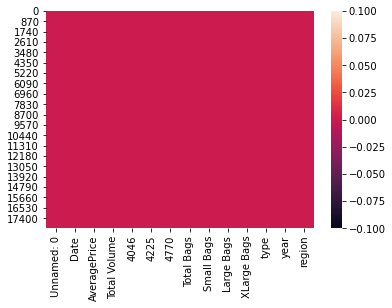

In [10]:
sns.heatmap(df.isnull())  #checking null values


In [11]:
df.nunique()

Unnamed: 0         53
Date              169
AveragePrice      259
Total Volume    18237
4046            17702
4225            18103
4770            12071
Total Bags      18097
Small Bags      17321
Large Bags      15082
XLarge Bags      5588
type                2
year                4
region             54
dtype: int64

In [12]:
df.skew()


Unnamed: 0       0.108334
AveragePrice     0.580303
Total Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
Total Bags       9.756072
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
year             0.215339
dtype: float64

Many columns are having outliers

In [13]:
# Creating correlation matrix
cor = df.corr()
cor

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
Unnamed: 0,1.000000,-0.133008,0.014035,0.017628,0.019829,0.041752,-0.002219,0.000347,-0.009196,-0.011546,-0.171667
AveragePrice,-0.133008,1.000000,-0.192752,-0.208317,-0.172928,-0.179446,-0.177088,-0.174730,-0.172940,-0.117592,0.093197
Total Volume,0.014035,-0.192752,1.000000,0.977863,0.974181,0.872202,0.963047,0.967238,0.880640,0.747157,0.017193
4046,0.017628,-0.208317,0.977863,1.000000,0.926110,0.833389,0.920057,0.925280,0.838645,0.699377,0.003353
4225,0.019829,-0.172928,0.974181,0.926110,1.000000,0.887855,0.905787,0.916031,0.810015,0.688809,-0.009559
4770,0.041752,-0.179446,0.872202,0.833389,0.887855,1.000000,0.792314,0.802733,0.698471,0.679861,-0.036531
Total Bags,-0.002219,-0.177088,0.963047,0.920057,0.905787,0.792314,1.000000,0.994335,0.943009,0.804233,0.071552
Small Bags,0.000347,-0.174730,0.967238,0.925280,0.916031,0.802733,0.994335,1.000000,0.902589,0.806845,0.063915
Large Bags,-0.009196,-0.172940,0.880640,0.838645,0.810015,0.698471,0.943009,0.902589,1.000000,0.710858,0.087891
XLarge Bags,-0.011546,-0.117592,0.747157,0.699377,0.688809,0.679861,0.804233,0.806845,0.710858,1.000000,0.081033


In [14]:
#Using Label Encoder to convert all categorial data into numbers
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
list1=['type','region','year']
for i in list1:
    df[i]=le.fit_transform(df[i].astype(str))

In [15]:
df_new=df[df.columns]

In [16]:
#Dropping date column 
df_new.drop(columns=["Date"],inplace=True)

 Cheacking whether the columns has outliers or not

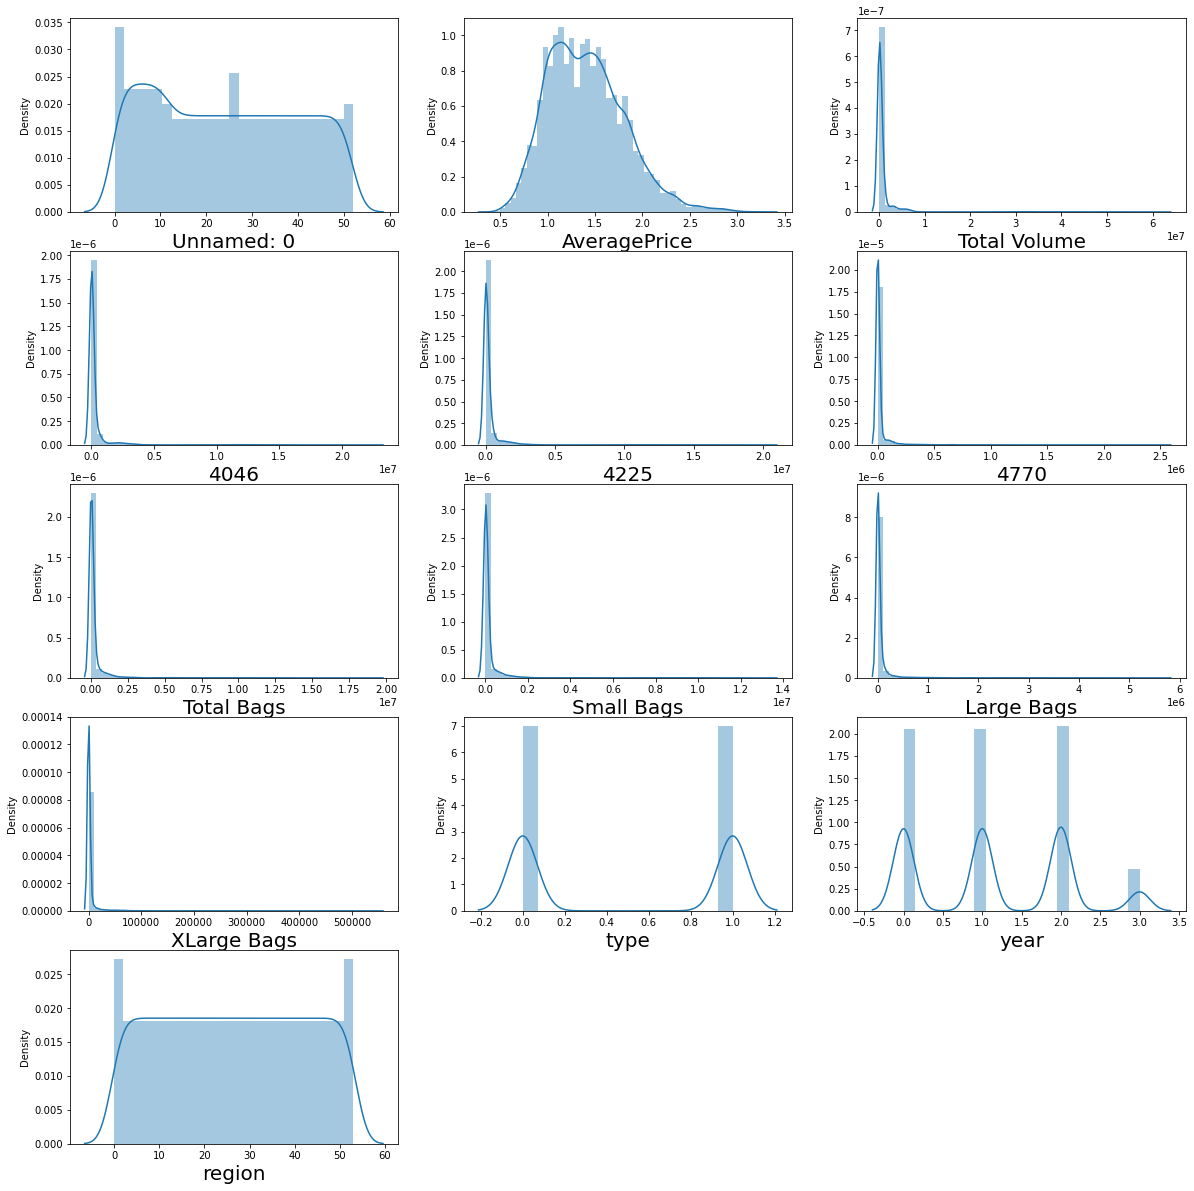

In [17]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in df_new.columns:
    if plotnumber<=13:
        ax = plt.subplot(6,3,plotnumber)
        sns.distplot(df_new[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

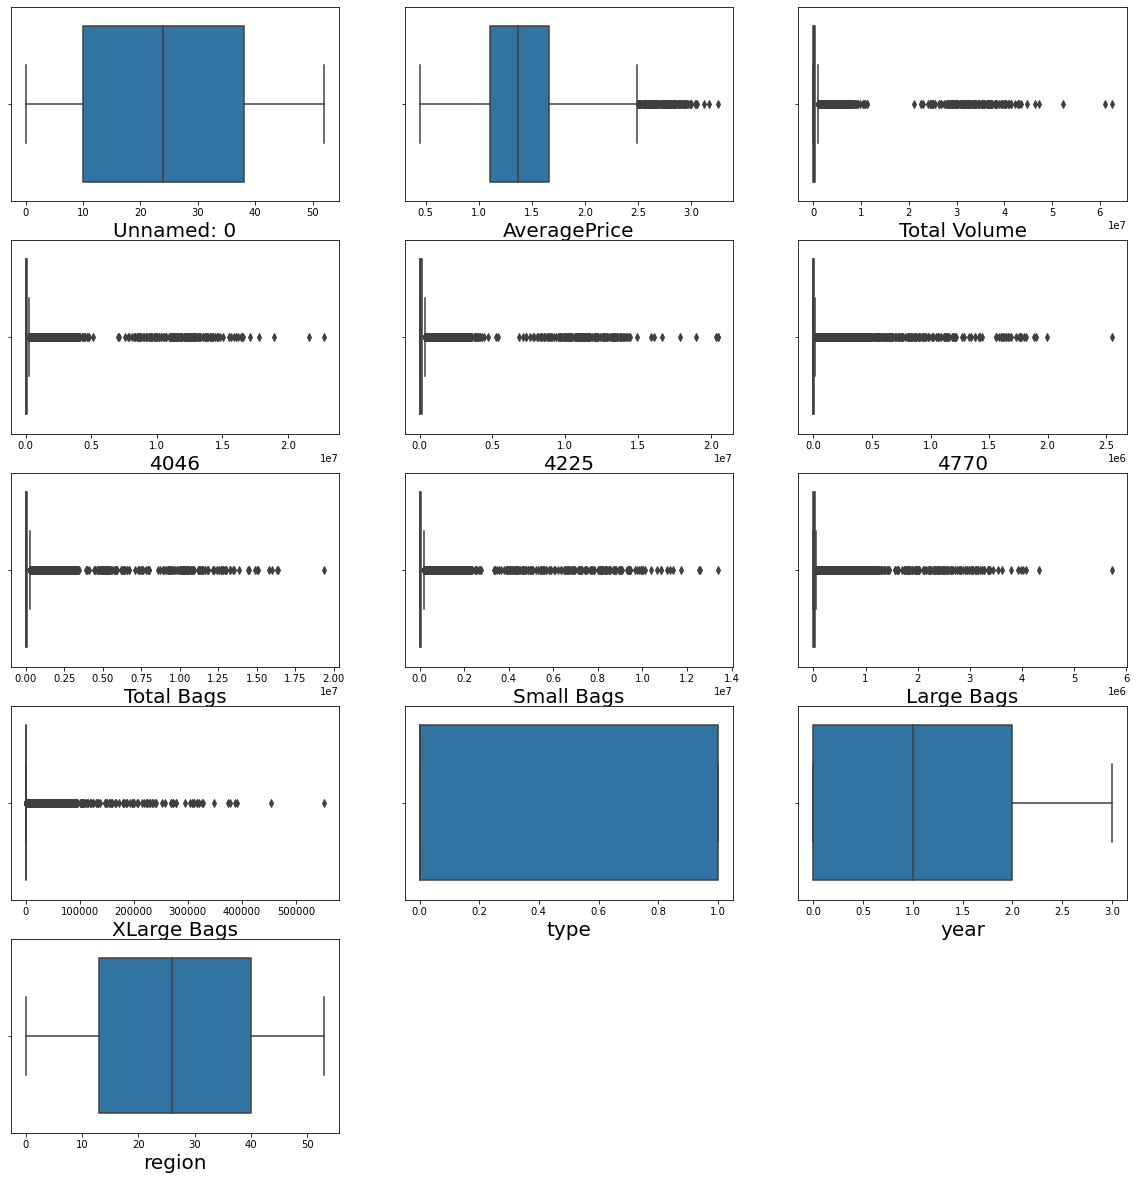

In [18]:
#Cheacking whether the columns has outliers or not using boxplot
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in df_new.columns:
    if plotnumber<=13:
        ax = plt.subplot(6,3,plotnumber)
        sns.boxplot(df_new[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

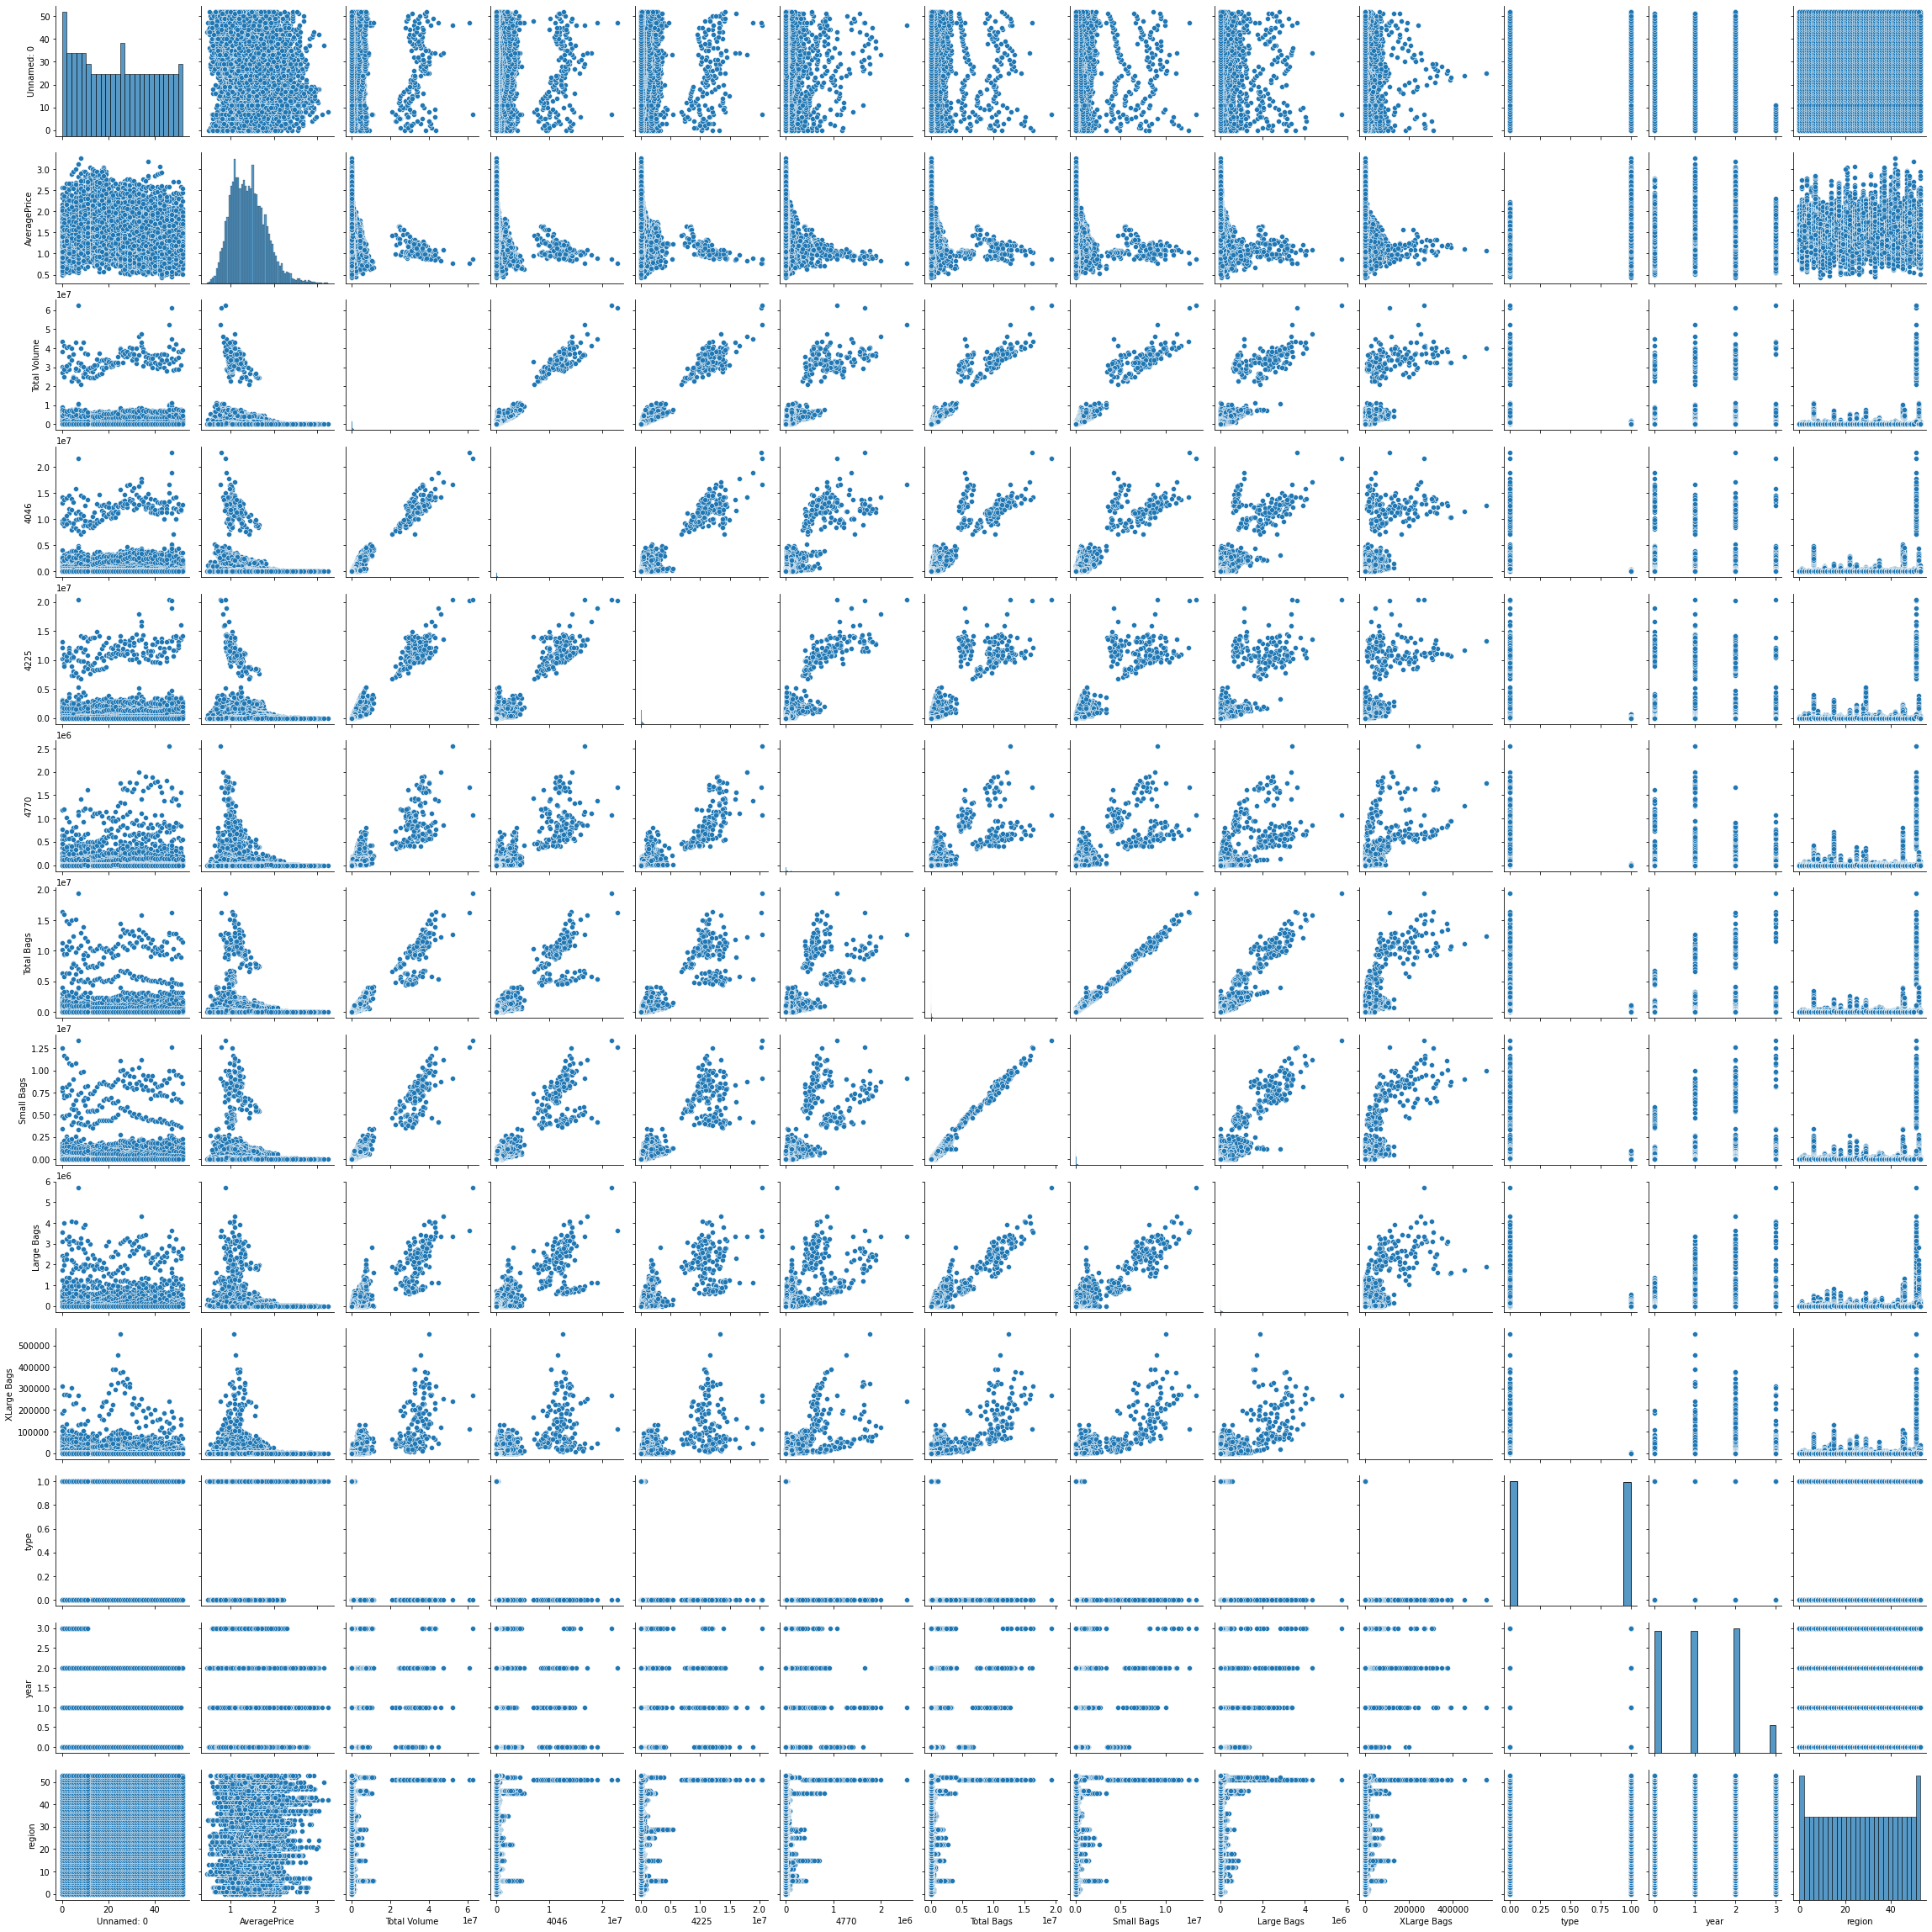

In [19]:
sns.pairplot(df_new) #multivariate analysis


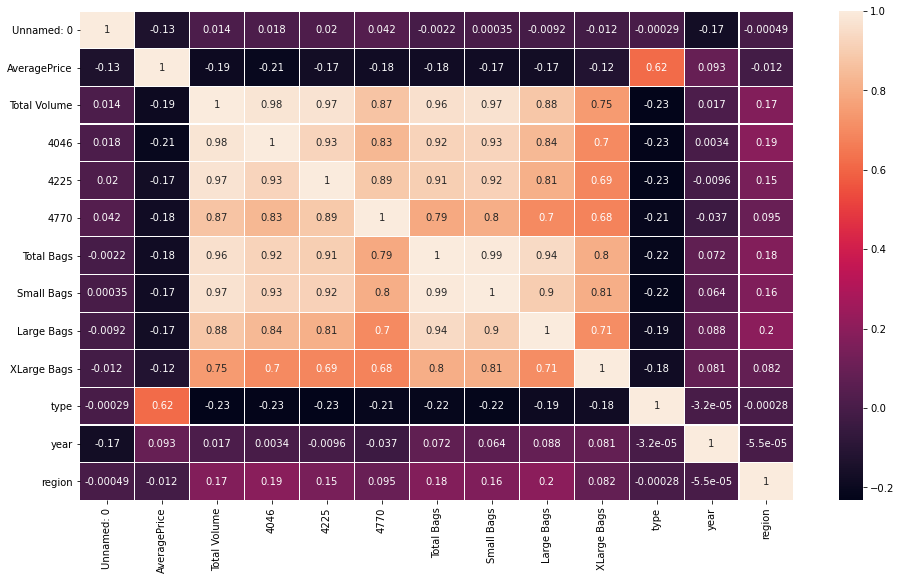

In [20]:
# Visualizing the correlation matrix by plotting heat map.
plt.figure(figsize=(16,9))
sns.heatmap(df_new.corr(),linewidths=.1, annot = True)
plt.yticks(rotation=0);

In [21]:
df_new.corr()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
Unnamed: 0,1.000000,-0.133008,0.014035,0.017628,0.019829,0.041752,-0.002219,0.000347,-0.009196,-0.011546,-0.000288,-0.171667,-0.000489
AveragePrice,-0.133008,1.000000,-0.192752,-0.208317,-0.172928,-0.179446,-0.177088,-0.174730,-0.172940,-0.117592,0.615845,0.093197,-0.011716
Total Volume,0.014035,-0.192752,1.000000,0.977863,0.974181,0.872202,0.963047,0.967238,0.880640,0.747157,-0.232434,0.017193,0.174176
4046,0.017628,-0.208317,0.977863,1.000000,0.926110,0.833389,0.920057,0.925280,0.838645,0.699377,-0.225819,0.003353,0.192073
4225,0.019829,-0.172928,0.974181,0.926110,1.000000,0.887855,0.905787,0.916031,0.810015,0.688809,-0.232289,-0.009559,0.145726
4770,0.041752,-0.179446,0.872202,0.833389,0.887855,1.000000,0.792314,0.802733,0.698471,0.679861,-0.210027,-0.036531,0.095252
Total Bags,-0.002219,-0.177088,0.963047,0.920057,0.905787,0.792314,1.000000,0.994335,0.943009,0.804233,-0.217788,0.071552,0.175256
Small Bags,0.000347,-0.174730,0.967238,0.925280,0.916031,0.802733,0.994335,1.000000,0.902589,0.806845,-0.220535,0.063915,0.164702
Large Bags,-0.009196,-0.172940,0.880640,0.838645,0.810015,0.698471,0.943009,0.902589,1.000000,0.710858,-0.193177,0.087891,0.198768
XLarge Bags,-0.011546,-0.117592,0.747157,0.699377,0.688809,0.679861,0.804233,0.806845,0.710858,1.000000,-0.175483,0.081033,0.082281


In [22]:
# removing outliers by Zscore

from scipy.stats import zscore
z=np.abs(zscore(df_new))
df1=df[(z<3).all(axis=1)]
df1


,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,0,0
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,0,0
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,0,0
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,0,0
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1,3,53
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1,3,53
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1,3,53
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1,3,53


In [23]:
df_new.shape

(18249, 13)

In [24]:
df1.shape

(17651, 14)

In [25]:
# Let's check the the data loss
data_loss = (18249-17651)/18249*100
data_loss

3.276891884486821

3.276% loss by Zscore which is less than 5%

Checking skewness

In [26]:
df1.skew()


Unnamed: 0      0.106116
AveragePrice    0.377432
Total Volume    3.767138
4046            4.909848
4225            4.455745
4770            5.117170
Total Bags      4.066771
Small Bags      4.222706
Large Bags      5.053434
XLarge Bags     6.135607
type           -0.037741
year            0.229976
region          0.012798
dtype: float64

Removing skewness using yeo-johnson method

In [27]:
# Defining skewed columns 
features = ["Total Volume","4046","4225","4770","Total Bags","Small Bags","Large Bags","XLarge Bags"]

In [28]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')

In [29]:
df1[features] = scaler.fit_transform(df1[features].values)
df1[features]

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags
0,-0.075324,-0.657421,0.351430,-0.222566,-0.537507,-0.347421,-0.781153,-0.677919
1,-0.147497,-0.777179,0.269513,-0.175223,-0.498128,-0.311322,-0.771198,-0.677919
2,0.205556,-0.731776,0.649333,0.023923,-0.566369,-0.374453,-0.758523,-0.677919
3,0.019655,-0.632592,0.468799,-0.121164,-0.713068,-0.510991,-0.699123,-0.677919
4,-0.180674,-0.684504,0.262126,-0.110491,-0.686312,-0.490534,-0.607027,-0.677919
...,...,...,...,...,...,...,...,...
18244,-0.678214,-0.462066,-0.926028,-1.228986,-0.340422,-0.175753,-0.412401,-0.677919
18245,-0.771326,-0.618019,-0.670600,-1.228986,-0.509513,-0.331971,-0.484991,-0.677919
18246,-0.775274,-0.617966,-0.778893,0.445710,-0.503366,-0.313756,-0.950743,-0.677919
18247,-0.701797,-0.547011,-0.716371,0.445399,-0.434176,-0.250408,-0.916068,-0.677919


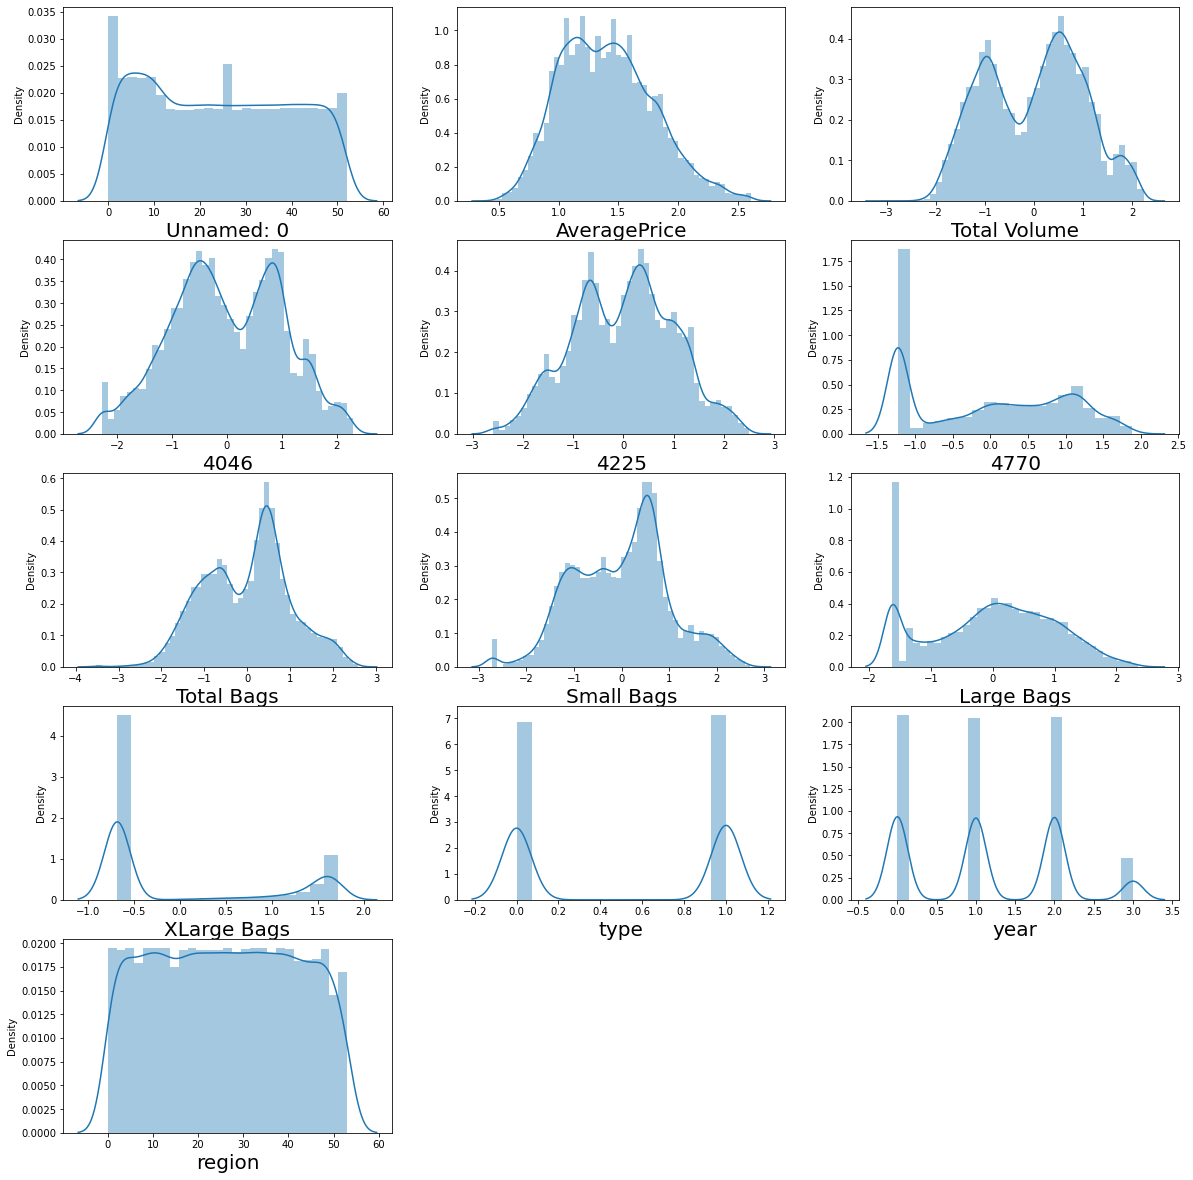

In [30]:
#Dropping date column 
df1.drop(columns=["Date"],inplace=True)
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in df1.columns:
    if plotnumber<=13:
        ax = plt.subplot(6,3,plotnumber)
        sns.distplot(df1[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

In [31]:
df1.skew()

Unnamed: 0      0.106116
AveragePrice    0.377432
Total Volume   -0.008642
4046           -0.039282
4225           -0.044675
4770            0.024168
Total Bags     -0.022204
Small Bags     -0.024405
Large Bags     -0.110913
XLarge Bags     0.853758
type           -0.037741
year            0.229976
region          0.012798
dtype: float64

Skewness is removed

# Model Preparation

In [32]:
x = df1.drop(columns = ['AveragePrice'],axis = 1)
y = df1['AveragePrice']

In [33]:
x

,Unnamed: 0,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,-0.075324,-0.657421,0.351430,-0.222566,-0.537507,-0.347421,-0.781153,-0.677919,0,0,0
1,1,-0.147497,-0.777179,0.269513,-0.175223,-0.498128,-0.311322,-0.771198,-0.677919,0,0,0
2,2,0.205556,-0.731776,0.649333,0.023923,-0.566369,-0.374453,-0.758523,-0.677919,0,0,0
3,3,0.019655,-0.632592,0.468799,-0.121164,-0.713068,-0.510991,-0.699123,-0.677919,0,0,0
4,4,-0.180674,-0.684504,0.262126,-0.110491,-0.686312,-0.490534,-0.607027,-0.677919,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,-0.678214,-0.462066,-0.926028,-1.228986,-0.340422,-0.175753,-0.412401,-0.677919,1,3,53
18245,8,-0.771326,-0.618019,-0.670600,-1.228986,-0.509513,-0.331971,-0.484991,-0.677919,1,3,53
18246,9,-0.775274,-0.617966,-0.778893,0.445710,-0.503366,-0.313756,-0.950743,-0.677919,1,3,53
18247,10,-0.701797,-0.547011,-0.716371,0.445399,-0.434176,-0.250408,-0.916068,-0.677919,1,3,53


In [34]:
y

0        1.33
1        1.35
2        0.93
3        1.08
4        1.28
         ... 
18244    1.63
18245    1.71
18246    1.87
18247    1.93
18248    1.62
Name: AveragePrice, Length: 17651, dtype: float64

# Standard scaler

In [35]:
#using Standard scaler to scale the dataset
from sklearn.preprocessing import StandardScaler
ssc=StandardScaler()
x = pd.DataFrame(ssc.fit_transform(x), columns=x.columns)

In [38]:
#This we will use for Classification
x_class=x
y_class=y


# 1. Regression 

# Creating train test split

In [43]:
#Importing some neccessary libraries
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

Checking for best random state which give best r2 score for various training techniques used to get best prediction Defining a function to check for best random state and r2 score.

In [40]:
def Findr2_score(tec,x,y):
    max_r_score=0
    for r_state in range(10,100):
        train_x,test_x,train_y,test_y = train_test_split(x,y,random_state = r_state,test_size=0.20)
        tec.fit(train_x,train_y)
        pred = tec.predict(test_x)
        temp=r2_score(test_y,pred)
        if temp>max_r_score:
            max_r_score=temp
            final_r_state=r_state
    mse = mean_squared_error(test_y,pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(test_y,pred)
    print("max r2 score : ",max_r_score, 'its random state: ',final_r_state,)
    print("MSE :", mse)  
    print("MAE :", mae)
    print("RMSE :", rmse)   

In [41]:
#Importing various methods from libraries
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso,Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn import svm
from sklearn.svm import SVR
import warnings
warnings.filterwarnings("ignore")

1. Model with LinearRegression

In [44]:
LR=LinearRegression()
Findr2_score(LR,x,y)

max r2 score :  0.5596806805133137 its random state:  82
MSE : 0.06648469641445917
MAE : 0.20304658158789343
RMSE : 0.25784626507758296


2. Model with Decision Tree Regressor

In [45]:
DT=DecisionTreeRegressor()
Findr2_score(DT,x,y)

max r2 score :  0.8033851933618565 its random state:  35
MSE : 0.03389612007929765
MAE : 0.11954687057490795
RMSE : 0.18410898967540298


3.Model with KNeighborsRegressor

In [46]:
KN=KNeighborsRegressor()
Findr2_score(KN,x,y)

max r2 score :  0.8917182963491378 its random state:  88
MSE : 0.01750164825828377
MAE : 0.09300141602945342
RMSE : 0.13229379523728152


4.Model with RandomForestRegressor

In [47]:
RF=RandomForestRegressor()
Findr2_score(RF,x,y)

max r2 score :  0.9053531830494936 its random state:  29
MSE : 0.014938782741433017
MAE : 0.0855868592466723
RMSE : 0.12222431321726875


5.Model with Adaboost Regressor

In [48]:
AB=AdaBoostRegressor()
Findr2_score(AB,x,y)

max r2 score :  0.5781142618772808 its random state:  55
MSE : 0.06585856749786193
MAE : 0.20784910772421578
RMSE : 0.25662924131490145


6. Model with GradientBoost Regressor

In [49]:
GB=GradientBoostingRegressor()
Findr2_score(GB,x,y)

max r2 score :  0.7566747478719311 its random state:  82
MSE : 0.036203873568270345
MAE : 0.14385060684858963
RMSE : 0.19027315514352083


7. Ridge Regression

In [50]:
RidgeR=Ridge()
Findr2_score(RidgeR,x,y)

max r2 score :  0.5596774966433331 its random state:  82
MSE : 0.06648192449966214
MAE : 0.20303740071410814
RMSE : 0.25784088989076603


8.Extra Trees Regressor

In [51]:
et = ExtraTreesRegressor()
Findr2_score(et,x,y)

max r2 score :  0.92443326699536 its random state:  83
MSE : 0.011849251897479469
MAE : 0.07468227131124329
RMSE : 0.10885426908247314


9.Support Vector Machine Regressor

In [52]:
svr=SVR()
Findr2_score(svr,x,y)

max r2 score :  0.8073436435855693 its random state:  83
MSE : 0.028302429920996946
MAE : 0.12450414756532484
RMSE : 0.16823326044809614


# Cross Validation Score

In [55]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=144)

In [56]:
print("Linear Regression:",cross_val_score(LR,x_train,y_train,cv=7,scoring="r2").mean())
print("Decision Tree Regressor:",cross_val_score(DT,x_train,y_train,cv=7,scoring="r2").mean())
print("K-Neighbors Regressor:",cross_val_score(KN,x_train,y_train,cv=7,scoring="r2").mean())
print("Random Forest Regressor:",cross_val_score(RF,x_train,y_train,cv=7,scoring="r2").mean())
print("Adaboost Regressor:",cross_val_score(AB,x_train,y_train,cv=7,scoring="r2").mean())
print("GradientBoost Regressor:",cross_val_score(GB,x_train,y_train,cv=7,scoring="r2").mean())
print("Ridge Regression:",cross_val_score(RidgeR,x_train,y_train,cv=7,scoring="r2").mean())
print("Extra Trees Regressor:",cross_val_score(et,x_train,y_train,cv=7,scoring="r2").mean())
print("Support Vector Machine:",cross_val_score(svr,x_train,y_train,cv=7,scoring="r2").mean())

Linear Regression: 0.5374889613225403
Decision Tree Regressor: 0.7394760268978072
K-Neighbors Regressor: 0.8609146273645623
Random Forest Regressor: 0.8839667521081573
Adaboost Regressor: 0.5410016493588429
GradientBoost Regressor: 0.7390512592571292
Ridge Regression: 0.5374893821391218
Extra Trees Regressor: 0.9074497269119509
Support Vector Machine: 0.7885689201669344


# Hyper parameter tuning

ExtraTrees Regressor is giving best results in Cross Validation compare to others so we will do Hyper parameter tuning   ExtraTreesRegressor.

In [57]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=144)

In [60]:
params = {'n_estimators':[100,150,200,250],
         'max_depth':[7,9,11,13,15],
         'min_samples_split':[3,4,6,8],
         'bootstrap':[True, False],
         'n_jobs':[-1,-2,-3]}

In [61]:
et = GridSearchCV(ExtraTreesRegressor(),params,cv =7, n_jobs = -1)
et.fit(x_train,y_train)

GridSearchCV(cv=7, estimator=ExtraTreesRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [7, 9, 11, 13, 15],
                         'min_samples_split': [3, 4, 6, 8],
                         'n_estimators': [100, 150, 200, 250],
                         'n_jobs': [-1, -2, -3]})

In [62]:
et.best_params_

{'bootstrap': False,
 'max_depth': 15,
 'min_samples_split': 3,
 'n_estimators': 250,
 'n_jobs': -3}

In [64]:
Final_mod=ExtraTreesRegressor(n_estimators=250,max_depth=15,min_samples_split=3,bootstrap='False',n_jobs=-3)
Final_mod.fit(x_train,y_train)
pred=Final_mod.predict(x_test)
acc=r2_score(y_test, pred)

print(acc*100)

88.65755062934137


After Hyper parameter tuning acuracy is decresed by 2%,but better than others so we will go for ExtraTrees Regressor 

# Best Model Saving

ExtraTrees Regressor is giving best results compare to others so we will create model using ExtraTreesRegressor.

In [69]:
import pickle
filename='AvacadoPredict.pkl'
pickle.dump(Final_mod,open(filename,'wb'))

,Y Test,Pred
16771,2.00,1.851744
2707,0.75,0.871407
7832,1.04,1.207482
223,1.03,1.077612
1535,1.27,1.249717


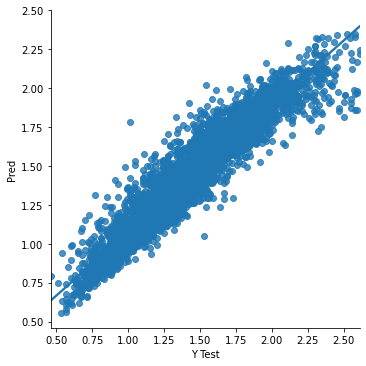

In [70]:
res=pd.DataFrame()
res['Actual']=y_test
pred_lr=Final_mod.predict(x_test)

data = pd.DataFrame({'Y Test':y_test , 'Pred':pred_lr},columns=['Y Test','Pred'])
sns.lmplot(x='Y Test',y='Pred',data=data,palette='rainbow')
data.head()

ExtraTrees Regressor is giving best acuracy.